In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Path to the folder containing the images
image_folder_path = "/kaggle/input/dataset"

# Lists to store the image paths and labels
image_paths = []
labels = []


for filename in os.listdir(image_folder_path):
    if filename.endswith(".png"):
        image_path = os.path.join(image_folder_path, filename)
        image_paths.append(image_path)
        # Extract the label from the image name
        label = filename.split("_")[1].split(".")[0]
        labels.append(label)

# Lists to store the extracted features and corresponding labels
features = []
target_labels = []

# Loop through the image paths and extract features
for image_path, label in zip(image_paths, labels):
    image = cv2.imread(image_path)
    # Resize the image to a larger size
    image = cv2.resize(image, (128, 128))
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Extract features from the grayscale image
    # Example: Using Histogram of Oriented Gradients (HOG) with OpenCV
    hog = cv2.HOGDescriptor((128, 128), (16, 16), (8, 8), (8, 8), 9)
    hog_features = hog.compute(gray)
    # Reshape the feature vector
    hog_features = hog_features.flatten()
    # Append the features and label to the lists
    features.append(hog_features)
    target_labels.append(label)

# Convert the lists to numpy arrays
X = np.array(features)
y = np.array(target_labels)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [5]:
y_test.size

200

# DECISION TREE

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle
classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1)


# Save the classifier's weights to a file
weights_file = "classifier_weights.pkl"
with open(weights_file, "wb") as f:
    pickle.dump(classifier, f)


for i in range(10):
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Iteration:", i+1, "Accuracy:", accuracy_train)

    #Update the training set with misclassified examples
    misclassified_examples = X_train[np.reshape(y_train != y_pred_train, (-1,))]
    misclassified_labels = y_train[np.reshape(y_train != y_pred_train, (-1,))]
    X_train = np.vstack((X_train, misclassified_examples))
    y_train = np.hstack((y_train, misclassified_labels))
from IPython.display import FileLink
FileLink(weights_file)

Iteration: 1 Accuracy: 1.0
Iteration: 2 Accuracy: 1.0
Iteration: 3 Accuracy: 1.0
Iteration: 4 Accuracy: 1.0
Iteration: 5 Accuracy: 1.0
Iteration: 6 Accuracy: 1.0
Iteration: 7 Accuracy: 1.0
Iteration: 8 Accuracy: 1.0
Iteration: 9 Accuracy: 1.0
Iteration: 10 Accuracy: 1.0


/kaggle/working/classifier_weights.pkl

In [9]:
predictions = classifier.predict(X_test)
correct =0
# Print the predicted label and actual label for each test image
for i in range(len(predictions)):
#     print("Predicted Label:", predictions[i])
#     print("Actual Label:", y_test[i])
#     print("-----------------------")
    if(predictions[i]==y_test[i]):
        correct+=1

print("total : ", y_test.size)
        
print("correct : ", correct)

print("accuracy : ", 100*correct/y_test.size)

total :  200
correct :  194
accuracy :  97.0


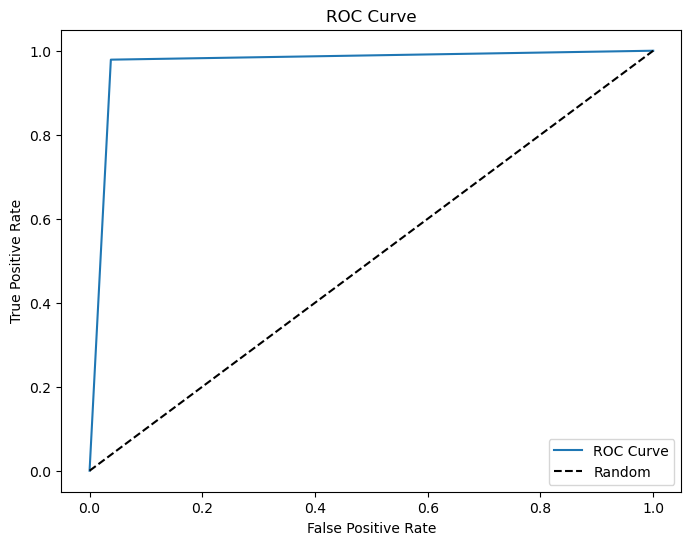

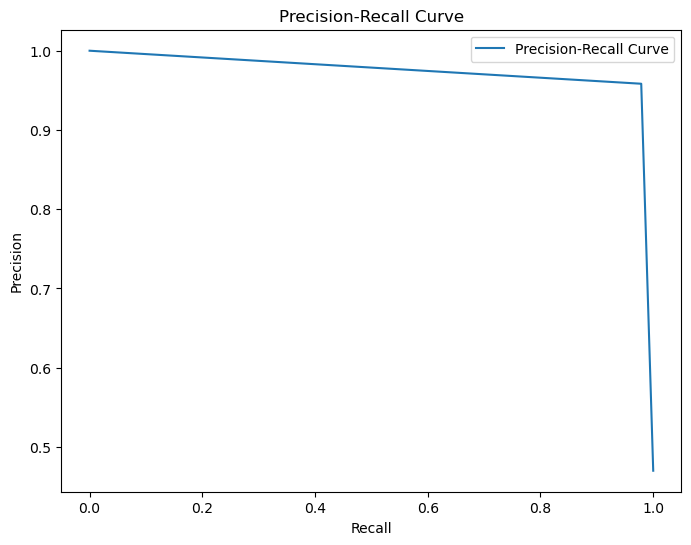

In [12]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
# Convert categorical labels to binary format
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)

# Compute the predicted probabilities for positive class
probs = classifier.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, probs)

# Compute the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_binary, probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


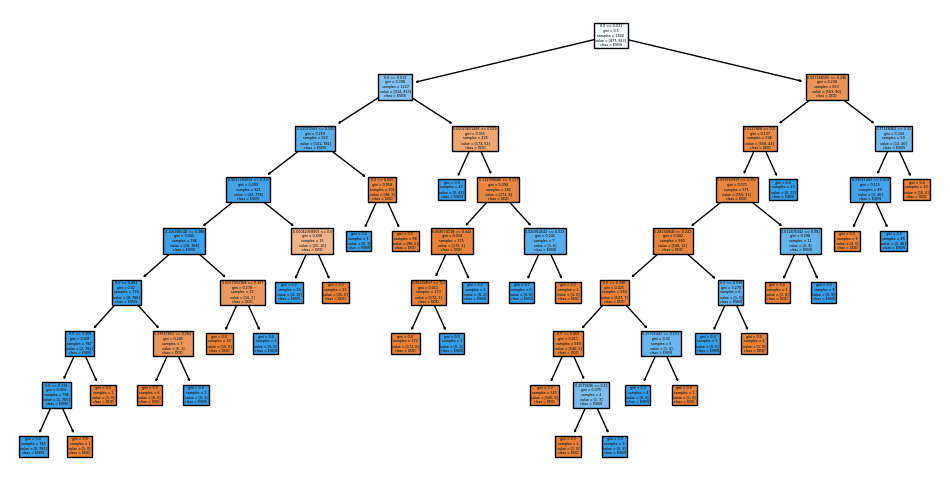

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.tree import plot_tree

# 3. Decision Tree Visualization
plt.figure(figsize=(12, 6))
plot_tree(classifier, filled=True, feature_names=hog_features, class_names=['ODD', 'EVEN'])
plt.savefig('decision_tree.png', dpi=300)
# plt.savefig('/kaggle/working/decision_tree.png')
plt.show()


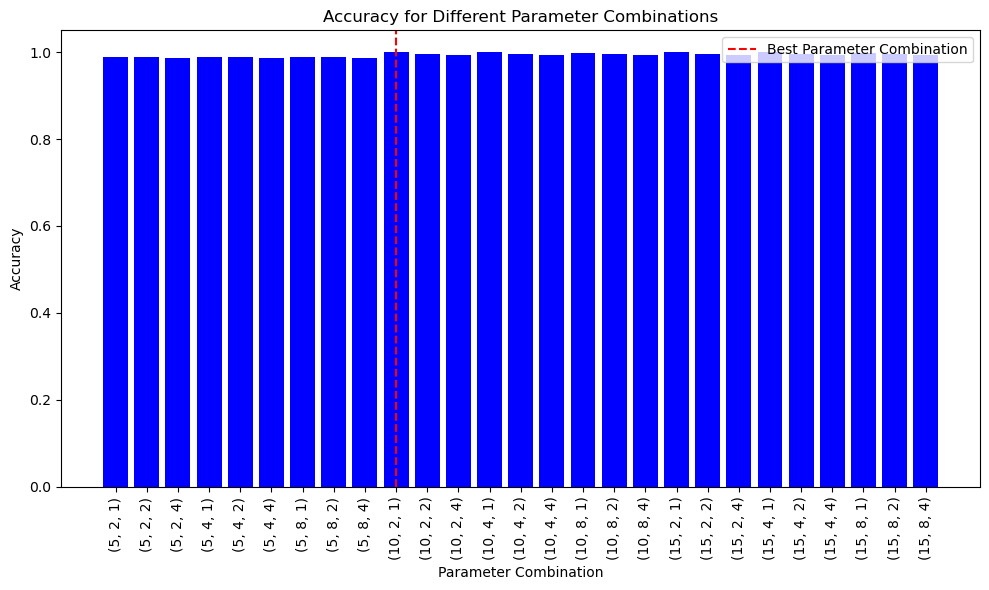

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize lists to store parameter combinations and accuracy values
parameters = []
accuracies = []

# Iterate over each parameter combination
for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            # Create the decision tree classifier with the current parameter combination
            classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            
            # Fit the classifier to the training data
            classifier.fit(X_train, y_train)
            
            # Perform prediction on the training set
            y_pred_train = classifier.predict(X_train)
            
            # Calculate accuracy
            accuracy_train = accuracy_score(y_train, y_pred_train)
            
            # Append the parameter combination and accuracy to the lists
            parameters.append((max_depth, min_samples_split, min_samples_leaf))
            accuracies.append(accuracy_train)

# Convert the accuracies list to a numpy array
accuracies = np.array(accuracies)

# Find the index of the best accuracy
best_index = np.argmax(accuracies)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(range(len(accuracies)), accuracies, align='center', color='blue')
plt.xticks(range(len(accuracies)), parameters, rotation='vertical')
plt.xlabel('Parameter Combination')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Parameter Combinations')
plt.axvline(x=best_index, color='red', linestyle='--', label='Best Parameter Combination')
plt.legend()
plt.tight_layout()
plt.show()


# KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Convert the lists to numpy arrays
X = np.array(features)
y = np.array(target_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier and print iteration and loss at each stage
for i in range(10):
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    loss = 1 - accuracy_score(y_train, y_pred)
    print("Iteration:", i+1, "Loss:", loss)

    # Update the training set with misclassified examples
    misclassified_examples = X_train[y_train != y_pred]
    misclassified_labels = y_train[y_train != y_pred]
    X_train = np.vstack((X_train, misclassified_examples))
    y_train = np.concatenate((y_train, misclassified_labels))


Iteration: 1 Loss: 0.0
Iteration: 2 Loss: 0.0
Iteration: 3 Loss: 0.0
Iteration: 4 Loss: 0.0
Iteration: 5 Loss: 0.0
Iteration: 6 Loss: 0.0
Iteration: 7 Loss: 0.0
Iteration: 8 Loss: 0.0
Iteration: 9 Loss: 0.0
Iteration: 10 Loss: 0.0


In [18]:
predictions = knn.predict(X_test)
correct = 0

# Print the predicted label and actual label for each test image
for i in range(len(predictions)):
#     print("Predicted Label:", predictions[i])
#     print("Actual Label:", y_test[i])
#     print("-----------------------")
    if predictions[i] == y_test[i]:
        correct += 1

print("total:", y_test.size)
print("correct:", correct)
print("accuracy:", 100 * correct / y_test.size)


total: 200
correct: 200
accuracy: 100.0


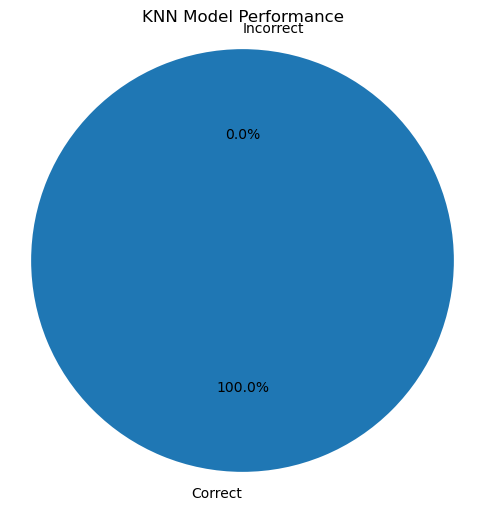

In [20]:
import matplotlib.pyplot as plt

# Calculate the number of correct and incorrect predictions
incorrect = y_test.size - correct

# Create labels and values for the plot
labels = ['Correct', 'Incorrect']
values = [correct, incorrect]

# Plot a pie chart to show the distribution of correct and incorrect predictions
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('KNN Model Performance')
plt.axis('equal')
plt.show()
